In [1]:
import pandas as pd
df_qu = pd.read_csv('dataset_qu.csv',sep=",")

In [2]:
df_qu = df_qu.drop(columns=['Marca temporal'])
df_qu

,text,sentiment
0,Kay unquyqa llapallan runakunata qawachichkan,0
1,Covid hunquy sinchi llakiypin tarichiwanchik k...,0
2,Kay unquyqa liwi runa kunatamam wañuy apachkan...,0
3,"Kay unquyqa supaypa ruwasqanmi, mana chusmi ka...",0
4,Manchakuypaqmi kay unquyqa Tiqsimuyuta muyuchkan,0
5,Ancha llakisqa. Runa wañuch,0
6,Millay unquy. Liwi runa kuba wañuchiy,0
7,Supay Onqoy,0
8,ñakaq onccoy,0
9,Kay oncoy sinchi runa wañuchin mana kanchu kun...,0


In [3]:
import pandas as pd
df_en = pd.read_csv('dataset_en.txt', delimiter = "\t")

In [4]:
cols = list(df_en.columns.values)
df_en = df_en[[cols[5]] + [cols[12]]]
df_en

,text,sentiment
0,with a basic understanding of the constitution...,1
1,and no matter what they do fails they will bla...,1
2,any connection here? planes diverted away fro...,1
3,.23 cent tip isn't worth my life or others del...,1
4,pls help\n …,1
...,...,...
67049,in this times we do pray to god to give us cou...,1
67050,"sharpton: 'to my surprise,' president trump ca...",1
67051,lived through all of that. thoughts to his fa...,1
67052,i don’t accept the premise that is our pm... ...,1


In [5]:
df_en[df_en['sentiment']==2]

,text,sentiment
5,adjusted timeline number of confirmed deaths ...,2
17,brilliant reply brother,2
27,i am now convinced that ethiopia is playing wi...,2
37,for months christopher stevens asked for more ...,2
45,i keep thinking it would make more sense to de...,2
...,...,...
67007,the best medicine for covid-19 is love,2
67016,"the fight against, coronavirus we are advised ...",2
67035,this sounds familiar...,2
67038,really useful info!,2


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #Para la división de datos
from textblob import TextBlob
import string #Para la limpieza de datos
import re #Para la limpieza de datos
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt #Para realizar las gráficas necesarias

In [7]:
"""
    Global Variables
"""

np.random.seed(0) #Para obtener los mismos números en cada utilización del código
#valance = 1

validation_size = 0.20
seed = 7

In [8]:
"""
    Methods
"""

#cleans the text by removing emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [9]:
#cleans the text by removing external links and user mentions by '@' symbol
def get_clean_text(text, keep_internal_punct=True):
    punctuation = string.punctuation
    text = str(text)
    text = re.sub(r'(@[A-Za-z0-9_]+)', '', text.lower())
    text = re.sub(r'\&\w*;', '', text.lower())
    text = re.sub(r'\$\w*', '', text.lower())
    text = re.sub(r'https?:\/\/.*\/\w*', '', text.lower())
    text = re.sub(r'#\w*', '', text.lower())
    text = re.sub(r'^RT[\s]+', '', text.lower())
    text = ''.join(c for c in text.lower() if c <= '\uFFFF')
    text = re.sub("[\(\[].*?[\)\]]", "", text.lower())
    text = remove_emoji(text)
    if not keep_internal_punct:
        text = re.sub(r'[' + punctuation.replace('@', '') + ']+', 
                         ' ', 
                         text.lower())
    return text.strip()

In [10]:
#tokenizes the sentences
def tokenize(text, keep_internal_punct=True):
    words = nltk.word_tokenize(text)
    if keep_internal_punct:
        return words
    else:
        words = [word.lower() for word in words if word.isalpha()]
        return words

In [11]:
#removes the stop words
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

#lemmatizes the tokens
def lemmatize(text):  #Con contexto
    lemmatizer = WordNetLemmatizer()
    lemmatized_token = []
    for word in text:
        lemmatized_token.append(lemmatizer.lemmatize(word))
    return lemmatized_token

#stems the tokens
def stemmer(text):  #Sin contexto
    stemmer = PorterStemmer()
    stemmed_tokens = []
    for word in text:
        stemmed_tokens.append(stemmer.stem(word))
    return stemmed_tokens

In [12]:
#tokenizes the text by cleaning and processing as per the input
def get_text_tokens(text, lemmatizing=True, 
                    stemming=True, keep_punctuation=True):
    cleaned_text = get_clean_text(text, keep_punctuation)
    text_tokens = tokenize(cleaned_text, keep_punctuation)
    text_tokens = remove_stopwords(text_tokens)
    if lemmatizing:
        text_tokens = lemmatize(text_tokens)
    if stemming:
        text_tokens = stemmer(text_tokens)
    return text_tokens

In [13]:
#reads the muse embedding vector file
def read_muse_vecs(muse_file):
    with open(muse_file, 'r',  errors='ignore', encoding="latin-1") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word_list = line[0: len(line) - 300]
            curr_word = ""
            for t in curr_word_list:
                curr_word = curr_word + str(t) + " "
            curr_word = curr_word.strip()
            words.add(curr_word)
            try:
                word_to_vec_map[curr_word] = np.array(line[-300:], 
                               dtype=np.float64)
            except:
                print(line, len(line))
        i = 1
        words_to_index = {}
        index_to_words = {}
        words.add("nokey")
        word_to_vec_map["nokey"] = np.zeros((300,), dtype=np.float64)
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map


In [14]:
#tokenizes the review dataframe as per the provided input options
def tokenize_reviews(df, keep_text=True, lemmatizing=True, 
                     stemming=True, keep_punctuation=True):
    X = []
    y = []
    for index, row in df.iterrows():
        tokens = []
        tokens += get_text_tokens(row["text"], 
                                  lemmatizing=lemmatizing, 
                                  stemming=stemming, 
                                  keep_punctuation=keep_punctuation)
        if len(tokens) > 0:
            X.append(tokens)
            y.append(int(row["sentiment"]))
    return X, y


In [15]:
df_en

,text,sentiment
0,with a basic understanding of the constitution...,1
1,and no matter what they do fails they will bla...,1
2,any connection here? planes diverted away fro...,1
3,.23 cent tip isn't worth my life or others del...,1
4,pls help\n …,1
...,...,...
67049,in this times we do pray to god to give us cou...,1
67050,"sharpton: 'to my surprise,' president trump ca...",1
67051,lived through all of that. thoughts to his fa...,1
67052,i don’t accept the premise that is our pm... ...,1


In [16]:
#tokenize_reviews(df_en)

In [17]:
#Get sentiment for text
def getSentiment(text):
    testimonial = TextBlob(text)
    sentiment = testimonial.sentiment.polarity
    if sentiment >= -1 and sentiment <= -0.65:
        return 0
    elif sentiment > -0.65 and sentiment <= 0.35:
        return 1
    else:
        return 2

In [18]:
#convert tokenized docs to vector embeddings by averaging
def docs_to_vector(docs, vec_map):
    vectors = []
    for doc in docs:
        vector = np.zeros((300,), dtype=np.float64)
        for token in doc:
            if token.lower() in vec_map:
                vector += vec_map[token.lower()]
            else:
                vector += vec_map["nokey"]
        vector /= len(doc)
        vectors.append(vector)
    return np.array(vectors)

In [19]:
#convert lables to one-hot vectors
def convert_to_one_hot(y, C):
    Y = np.eye(C)[y.reshape(-1)]
    return Y

In [20]:
#evaluate the model with the provided language text
def evaluate_model(model, lang, df3):
    word_to_index_l, index_to_words_l, word_to_vec_map_l = 0,0,0
    if lang == "quz":
        word_to_index_l, index_to_words_l, word_to_vec_map_l = read_muse_vecs('cc.qu.300.vec')
        
    test_set_l,y3 = tokenize_reviews(df3, keep_text=False, 
                                     stemming=False, keep_punctuation=True)
    
    X_test_l_vectors =  docs_to_vector(test_set_l, word_to_vec_map_l)
    Y_test_l_oh = convert_to_one_hot(np.array(y3), C=3)
    
    loss,acc = model.evaluate(x=X_test_l_vectors, y=Y_test_l_oh, 
                              batch_size=32, verbose=0)
    return acc
#return acc+valance

In [21]:
word_to_index_q, index_to_words_q, word_to_vec_map_q = read_muse_vecs('cc.qu.300.vec')

In [22]:
#word_to_index_q

In [23]:

"""
    Preprocessing English Dataset
"""

dataset_en = pd.read_csv('dataset_en.csv', sep="\t")

dataset_en["text"] = dataset_en['text'].apply(get_clean_text)

dataset_en['sentiment'] = dataset_en['text'].apply(getSentiment)

dataset_en = dataset_en[dataset_en.text != ""]

print("Amount of tweet in English language: ",dataset_en.shape)


Amount of tweet in English language:  (67054, 13)


In [24]:
cols = list(dataset_en.columns.values)
df_en = dataset_en
df_en = df_en[[cols[5]] + [cols[12]]]
df_en.to_csv('df_en_cleaned.txt', index=False, sep='\t')

In [25]:

"""
    Preprocessing Quechua Dataset
"""

dataset_quz = pd.read_csv('dataset_qu.csv', sep=",")



print("Amount of tweet in Quechua language: ",dataset_quz.shape)
print(dataset_quz)

Amount of tweet in Quechua language:  (23, 3)
                     Marca temporal  \
0   2021/05/26 11:37:48 a. m. GMT-5   
1    2021/05/26 2:23:54 p. m. GMT-5   
2    2021/05/26 7:48:39 p. m. GMT-5   
3    2021/05/26 8:16:13 p. m. GMT-5   
4   2021/05/27 12:31:44 a. m. GMT-5   
5    2021/05/27 1:36:38 a. m. GMT-5   
6    2021/05/27 3:03:56 a. m. GMT-5   
7   2021/05/27 12:35:19 p. m. GMT-5   
8    2021/05/27 1:02:19 p. m. GMT-5   
9    2021/05/27 5:46:23 p. m. GMT-5   
10  2021/05/28 12:25:25 a. m. GMT-5   
11   2021/05/28 7:34:33 p. m. GMT-5   
12   2021/05/28 7:34:50 p. m. GMT-5   
13   2021/05/28 8:07:17 p. m. GMT-5   
14   2021/05/28 8:07:17 p. m. GMT-5   
15   2021/05/27 5:46:23 p. m. GMT-5   
16   2021/05/27 1:36:38 a. m. GMT-5   
17   2021/05/26 8:16:13 p. m. GMT-5   
18   2021/05/26 2:23:54 p. m. GMT-5   
19   2021/05/27 5:46:23 p. m. GMT-5   
20   2021/05/27 3:03:56 a. m. GMT-5   
21   2021/05/28 8:07:17 p. m. GMT-5   
22   2021/05/28 9:07:17 p. m. GMT-5   

                 

In [26]:

'''
    Cross-Language Model
'''

# Split English Dataset
dataset_en_train, dataset_en_test = train_test_split(dataset_en, 
                                                     test_size=validation_size, 
                                                     random_state=seed)


In [27]:
dataset_en_train = dataset_en_train[[cols[5]] + [cols[12]]]
dataset_en_train

,text,sentiment
2585,"priyanka chopra, nick jonas cuddle up at los a...",1
11026,"ok, the virus won",2
60350,"see cnts like you. you need jailed now, you ar...",1
61218,pathetic...,0
66599,"a dark dark day for football, the last bastion...",1
...,...,...
53459,finally they have ordered all businesses close...,1
10742,"this made me cry, i died a little inside.",1
49689,rikers is just proof-of-concept. why do you th...,1
58564,"now that pigeons have taken ‘our’ land, who’s ...",1


In [28]:
dataset_en_test = dataset_en_test[[cols[5]] + [cols[12]]]
dataset_en_test

,text,sentiment
24523,german physician comments on how the coronavir...,1
60901,"in the interests of not scare mongering, it's ...",1
38780,this guy! you gotta love his craft,2
24080,imagine if grownups were in charge...,1
51117,you understand nothing but you’re own self imp...,2
...,...,...
2811,it's no hard to find drama queens in the healt...,1
63675,wait how are we gonna know when this coronavir...,1
57837,"watch his interview first,ok?don't be fooled",1
166,what if covid-19 mutated yet again we were ab...,2


In [29]:

#tokenize loaded dataframe
train_set,y = tokenize_reviews(dataset_en_train, keep_text=False, 
                               stemming=False, keep_punctuation=True)


test_set,y2 = tokenize_reviews(dataset_en_test, keep_text=False, 
                               stemming=False, keep_punctuation=True)

In [30]:
for i in range(10):
    print(test_set[i],'----->',y2[i])

['german', 'physician', 'comment', 'coronavirus', 'over-hyped', 'misunderstood', 'via'] -----> 1
['interest', 'scare', 'mongering', ',', "'s", 'worth', 'noting', 'number', 'test', 'carried', 'increased', 'dramatica…'] -----> 1
['guy', '!', 'got', 'ta', 'love', 'craft'] -----> 2
['imagine', 'grownup', 'charge', '...'] -----> 1
['understand', 'nothing', '’', 'self', 'importance', '.', 'australia', 'self', 'isolate', '.'] -----> 2
['dlsu', 'welcomed', 'homeless', 'stay', 'inside', 'manila', 'campus', 'luzon-wide', 'enhanced', 'community', 'quarantine…'] -----> 1
['store', 'going', 'full', 'shelf', 'cooler', '?', '.', '.', '.…'] -----> 1
['chinese', 'tycoon', 'jack', 'send', 'protective', 'suit', 'face', 'shield', 'philippine', 'help', 'fight', 'against…'] -----> 1
['tag', 'friend', 'kiska', 'name', 'sofiya', 'hy', '…'] -----> 1
['covid-19', 'hit', 'doctor', ',', 'nurse', 'emts', ',', 'threatening', 'health', 'system'] -----> 1


In [31]:
word_to_index, index_to_words, word_to_vec_map = read_muse_vecs('cc.en.300.vec')

In [32]:
#word_to_index

In [33]:
X_train_vectors = docs_to_vector(train_set, word_to_vec_map)
Y_train_oh = convert_to_one_hot(np.array(y), C=3)

X_test_vectors =  docs_to_vector(test_set, word_to_vec_map)
Y_test_oh = convert_to_one_hot(np.array(y2), C=3)

In [34]:
# Neuronal Model
def my_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim=300, activation='relu'))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    return model

model = my_model()
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [35]:
# Train English Model
snn = model.fit(X_train_vectors, Y_train_oh, epochs = 100, 
          batch_size = 32, shuffle=True, 
          validation_data=(X_test_vectors, Y_test_oh))

print(snn)

Epoch 1/100
1674/1674 [==============================] - 3s 2ms/step - loss: 0.3935 - accuracy: 0.8695 - val_loss: 0.3687 - val_accuracy: 0.8728
Epoch 2/100
1674/1674 [==============================] - 2s 1ms/step - loss: 0.3458 - accuracy: 0.8783 - val_loss: 0.3523 - val_accuracy: 0.8730
Epoch 3/100
1674/1674 [==============================] - 2s 1ms/step - loss: 0.3306 - accuracy: 0.8835 - val_loss: 0.3408 - val_accuracy: 0.8793
Epoch 4/100
1674/1674 [==============================] - 3s 2ms/step - loss: 0.3188 - accuracy: 0.8865 - val_loss: 0.3335 - val_accuracy: 0.8810
Epoch 5/100
1674/1674 [==============================] - 3s 2ms/step - loss: 0.3090 - accuracy: 0.8895 - val_loss: 0.3283 - val_accuracy: 0.8798
Epoch 6/100
1674/1674 [==============================] - 3s 2ms/step - loss: 0.2999 - accuracy: 0.8918 - val_loss: 0.3306 - val_accuracy: 0.8807
Epoch 7/100
1674/1674 [==============================] - 3s 2ms/step - loss: 0.2917 - accuracy: 0.8945 - val_loss: 0.3245 - val_ac

1674/1674 [==============================] - 2s 1ms/step - loss: 0.1003 - accuracy: 0.9656 - val_loss: 0.4380 - val_accuracy: 0.8752
Epoch 58/100
1674/1674 [==============================] - 2s 1ms/step - loss: 0.0984 - accuracy: 0.9661 - val_loss: 0.4609 - val_accuracy: 0.8820
Epoch 59/100
1674/1674 [==============================] - 2s 1ms/step - loss: 0.0950 - accuracy: 0.9678 - val_loss: 0.4469 - val_accuracy: 0.8802
Epoch 60/100
1674/1674 [==============================] - 2s 1ms/step - loss: 0.0932 - accuracy: 0.9682 - val_loss: 0.4515 - val_accuracy: 0.8737
Epoch 61/100
1674/1674 [==============================] - 2s 1ms/step - loss: 0.0923 - accuracy: 0.9686 - val_loss: 0.4513 - val_accuracy: 0.8695
Epoch 62/100
1674/1674 [==============================] - 2s 1ms/step - loss: 0.0904 - accuracy: 0.9693 - val_loss: 0.4619 - val_accuracy: 0.8730
Epoch 63/100
1674/1674 [==============================] - 2s 1ms/step - loss: 0.0889 - accuracy: 0.9698 - val_loss: 0.4684 - val_accuracy

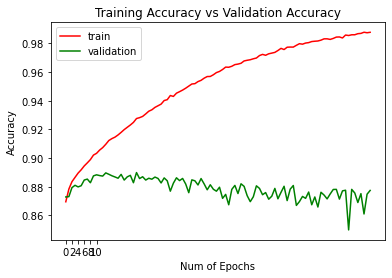

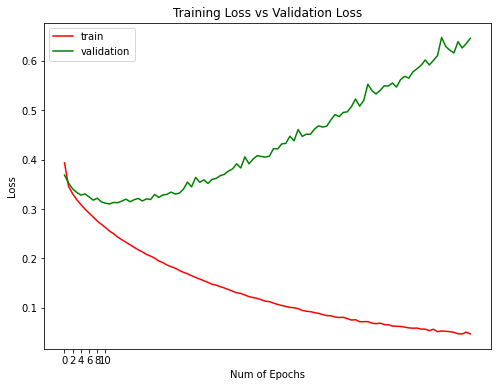

In [36]:
# Results
plt.figure(0)  
plt.plot(snn.history['accuracy'],'r')  
plt.plot(snn.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(snn.history['loss'],'r')  
plt.plot(snn.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

In [37]:
# Quechua Dataset Test model
acc_quz = evaluate_model(model, "quz", dataset_quz)
print("Accuracy is: ",acc_quz)

Accuracy is:  0.30434781312942505
